# 1. RUN THE CODE IN GOOGLE COLAB ! 

Image segmentation 

Even though the glob API is very simple, the module packs a lot of power. It is useful in any situation where your program needs to look for a list of files on the filesystem with names matching a pattern. If you need a list of filenames that all have a certain extension, prefix, or any common string in the middle, use glob instead of writing code to scan the directory contents yourself.

The pattern rules for glob are not regular expressions. Instead, they follow standard Unix path expansion rules. There are only a few special characters: two different wild-cards, and character ranges are supported. The patterns rules are applied to segments of the filename (stopping at the path separator, /). Paths in the pattern can be relative or absolute. Shell variable names and tilde (~) are not expanded.

Example Data¶

Image segmentation is the process of partitioning an image into multiple different regions (or segments). The goal is to change the representation of the image into an easier and more meaningful image.

It is an important step in image processing, as real world images doesn't always contain only one object that we wanna classify. For instance, for self driving cars, the image would contain the road, cars, pedestrians, etc. So we may need to use segmentation here to separate objects and analyze each object individually (i.e image classification) to check what it is.

K-Means clustering is unsupervised machine learning algorithm that aims to partition N observations into K clusters in which each observation belongs to the cluster with the nearest mean. A cluster refers to a collection of data points aggregated together because of certain similarities. For image segmentation, clusters here are different image colors.


Image segmentation is an essential topic in an image processing framework. It is the process to classify an image into different groups. There are many different methods, and k-means is one of the most popular methods.

In [1]:
from glob import glob

In [2]:

import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.color import rgb2grey
from sklearn.feature_extraction import image
from sklearn.cluster import KMeans

#https://medium.com/spinor/a-straightforward-introduction-to-image-thresholding-using-python-f1c085f02d5e
#https://datacarpentry.org/image-processing/07-thresholding/
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
#https://campus.datacamp.com/courses/introduction-to-data-visualization-in-python/analyzing-time-series-and-images?ex=13
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

from skimage.filters import rank, threshold_otsu
from skimage.morphology import closing, square, disk
from skimage import exposure as hist, data, img_as_float
from skimage.segmentation import chan_vese
from skimage.feature import canny
from skimage.color import rgb2gray
from scipy import ndimage as ndi 

In [3]:
mal_images = glob('../input/skin-cancer-malignant-vs-benign/data/train/malignant/*')[:5]
ben_images = glob('../input/skin-cancer-malignant-vs-benign/data/train/benign/*')[:5]

In [4]:
len(mal_images)

5

In [5]:
def binary(image):
    return image > threshold_otsu(image)

def equalize(image):
    return hist.equalize_hist(image)

#https://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm
def mean_filter(image, raio_disk):
    return rank.mean_percentile(image, selem = disk(raio_disk))

def preenche_bords(image):
    return ndi.binary_fill_holes(image)

#https://www.unioviedo.es/compnum/labs/PYTHON/intro_image.html

def load_images(paths):
    tmp = []
    for path in paths:
        tmp.append(imread(path))
    return tmp
    
def plot_any(arr, title = ''):
    plt.figure(figsize = (15, 25))
    for i in range(len(arr)):
        plt.subplot(1,len(arr),i + 1)
        plt.title(title)
        plt.imshow(arr[i]);

        
def plot_camadas(img):
    plt.figure(figsize = (15, 25))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img[:,:,i], cmap = 'gray');
        
def d2Kmeans(img, k):
    return KMeans(n_jobs=-1, 
                  random_state=1, 
                  n_clusters = k, 
                  init='k-means++'
    ).fit(img.reshape((-1,1))).labels_.reshape(img.shape)

def merge_segmented_mask_ROI(uri_img, img_kluster):
    new_img = uri_img.copy()
    for ch in range(3):
        new_img[:,:, ch] *= img_kluster
    return new_img


def elbow(img, k):
    hist = []
    for kclusters in  range(1, k):
        Km = KMeans(n_jobs=-1, random_state=1, n_clusters = kclusters, init='k-means++').fit(img.reshape((-1,1)))  
        hist.append(Km.inertia_)
        
    plt.figure(figsize = (15, 8))
    plt.grid()
    plt.plot(range(1, k), hist, 'o-')
    plt.ylabel('Soma das distâncias quadradas')
    plt.xlabel('k clusters')
    plt.title('Elbow')
    plt.show();
    
    

In [6]:
mal = load_images(mal_images)
ben = load_images(ben_images)

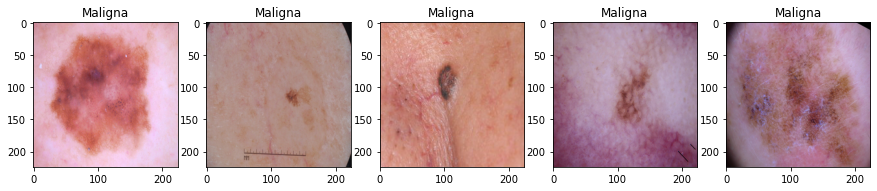

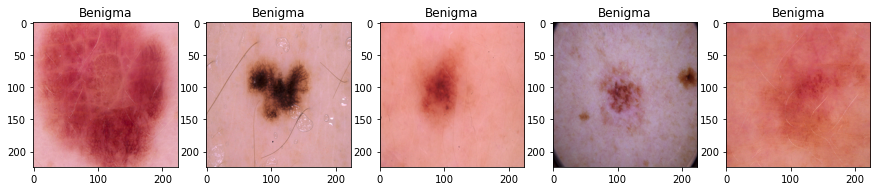

In [7]:
plot_any(mal, 'Maligna')
plot_any(ben, 'Benigma')


In [8]:
img_selected = mal[1]

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


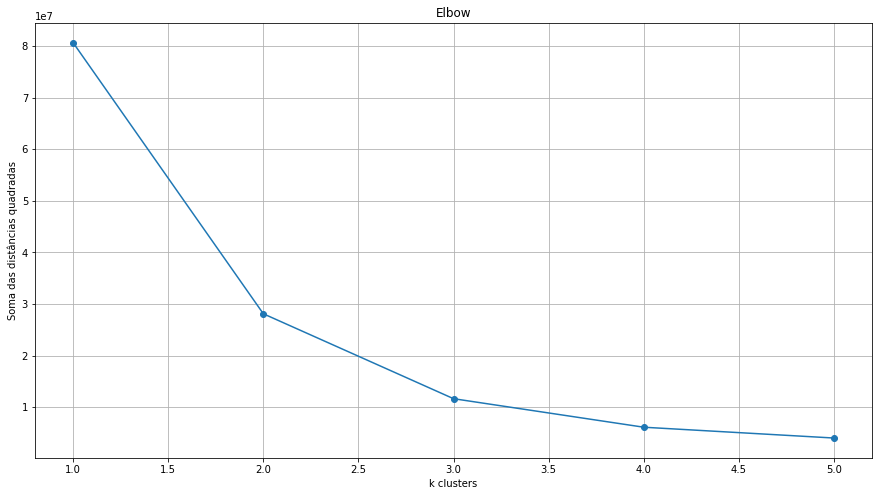

In [9]:
elbow(img_selected, 6)

In [10]:
k_klusters = 2

In [11]:
result_gray = d2Kmeans(rgb2grey(img_selected), k_klusters)
result_img = d2Kmeans(img_selected, k_klusters)

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


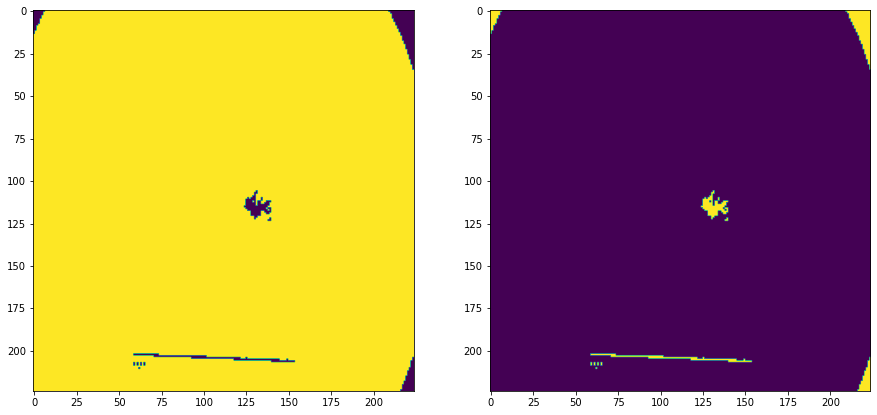

In [12]:
klusters_gray = [result_gray == i for i in range(k_klusters)]
plot_any(klusters_gray)

In [13]:
def select_cluster_index(clusters):
    minx = clusters[0].mean()
    index = 0
    for i in clusters:
        if i.mean() < minx:
            minx = i.mean()
            index += 1
    return index

In [14]:
index_kluster = select_cluster_index(klusters_gray)
print(index_kluster)
selecionado = klusters_gray[index_kluster]

1


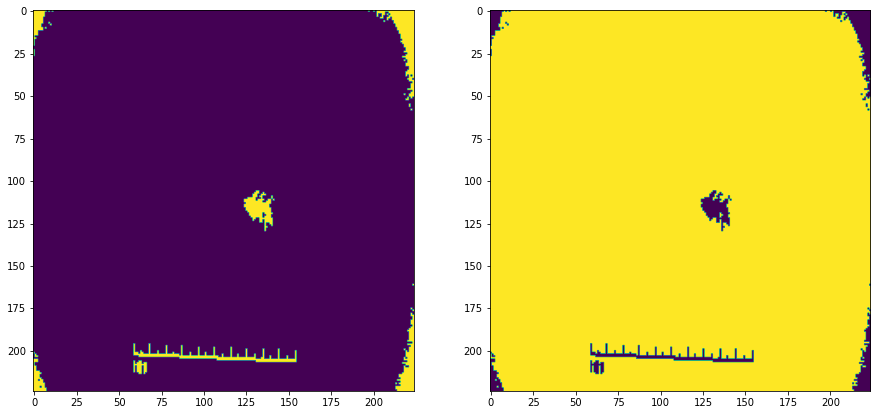

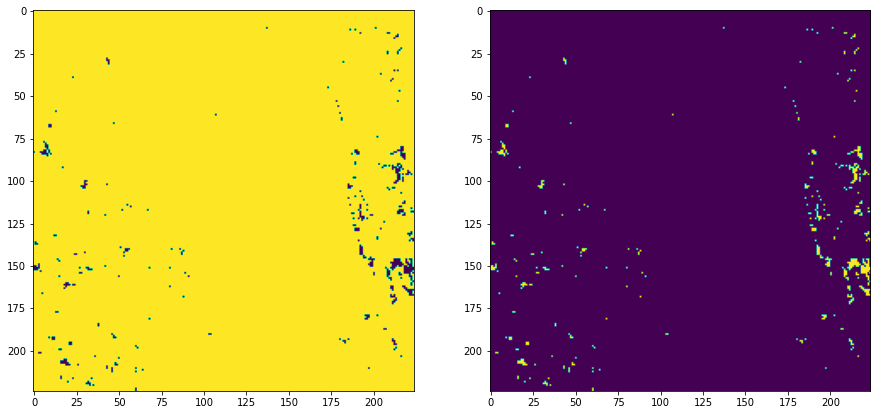

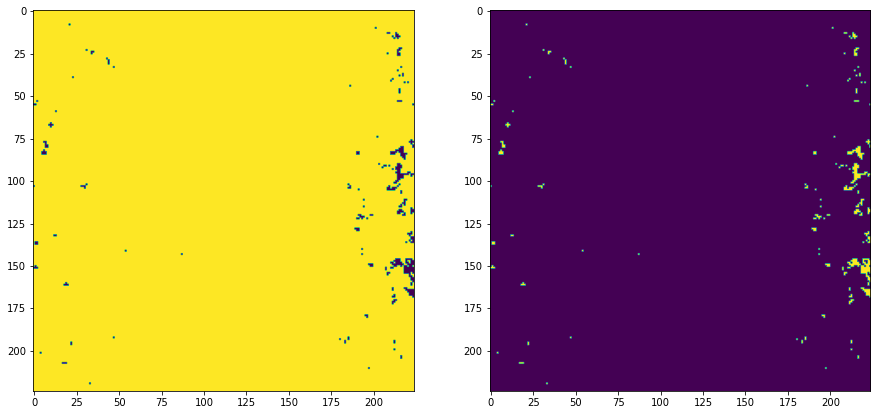

In [15]:
 for ch in range(3):
    img_k = []
    for K in range(k_klusters):
         img_k.append(result_img[:, :, ch] == K)
    plot_any(img_k)

In [16]:
clusters = [(result_img[:,:,1] == K) for K in range(k_klusters)]

In [17]:
clusters

[array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])]

In [18]:
new_img = merge_segmented_mask_ROI(img_selected, selecionado)

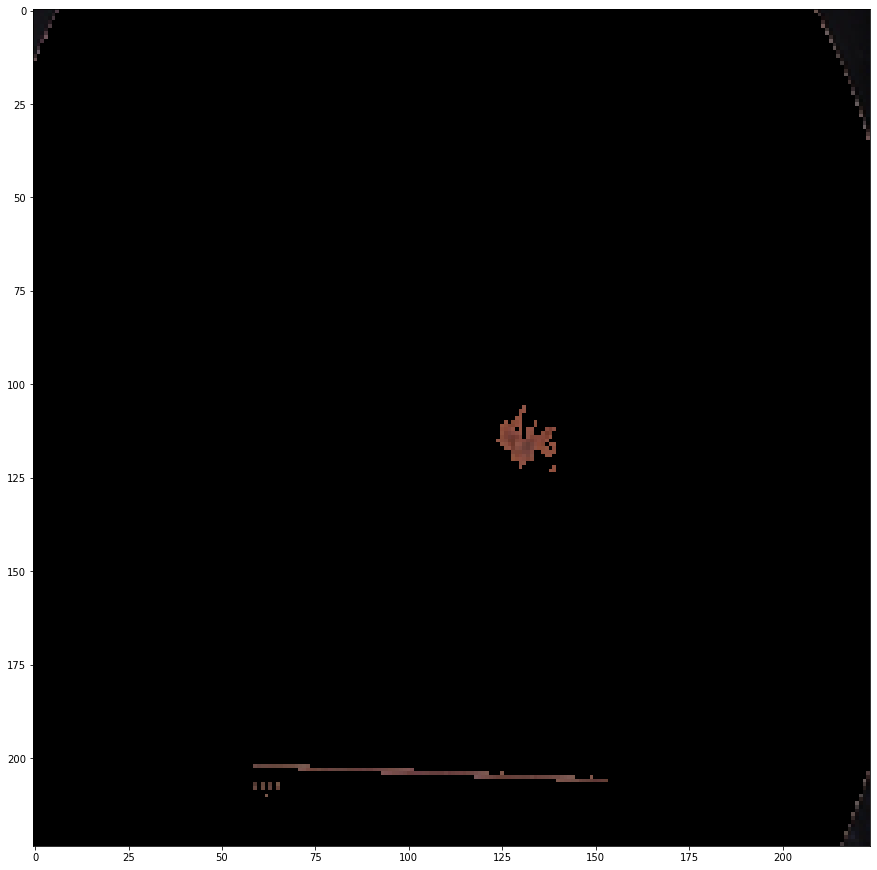

In [19]:
plot_any([new_img])

In [20]:
image_mean_filter = mean_filter(selecionado, 20)
test_binary = binary(image_mean_filter)

/opt/conda/lib/python3.7/site-packages/skimage/filters/rank/_percentile.py:42: UserWarning: Possible precision loss converting image of type bool to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


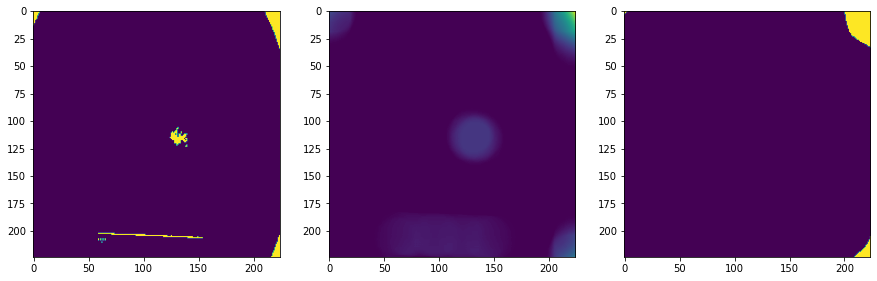

In [21]:
plot_any([selecionado, image_mean_filter, test_binary])

In [22]:
final_result = merge_segmented_mask_ROI(img_selected ,test_binary)

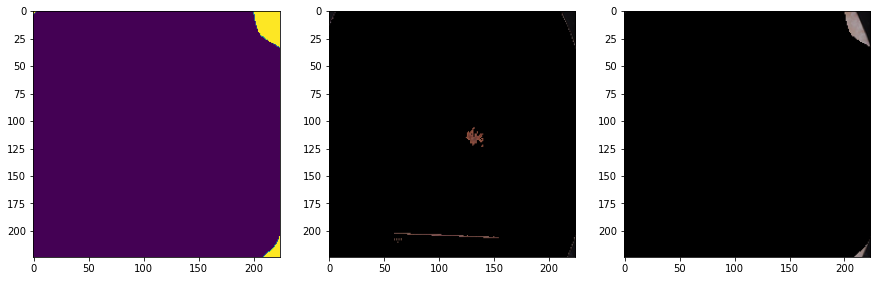

In [23]:
plot_any([test_binary, new_img, final_result])

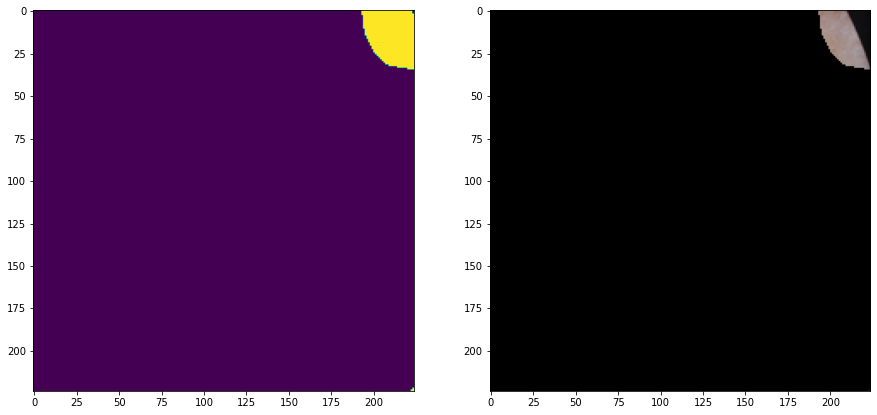

In [24]:
 max_mean = 0
img_gray = rgb2gray(final_result)
 img_bin  = binary(img_gray)
x, y = img_bin.shape

 limits_before = []
for i in range(x):
    for j in range(y):
        if  img_bin[i, j]:
            limits_before.append(j)
            
stop_before = ( sum(limits_before) // len(limits_before) ) // 2
img_copy = img_bin.copy()
for i in range(x):
    for j in range(stop_before):
        img_copy[i, j] = 0
        limits_after = []
for i in range(x):
     for j in range(y - 1, 0, -1):
        if  img_copy[i, j]:
            limits_after.append(j)
            
stop_after = sum(limits_after) // len(limits_after) + min(limits_after)
for i in range(x):
    for j in range(stop_after, y):
        img_copy[i, j] = 0

mean_result = mean_filter(img_copy, 15)
mean_result = binary(mean_result)
final_result = merge_segmented_mask_ROI(img_selected , mean_result)


 plot_any([mean_result, final_result])

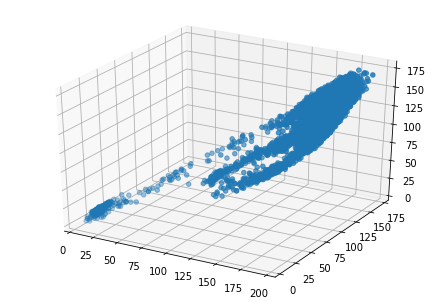

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
img = cv2.imread(mal_images[1]) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()
#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [27]:
original_image = cv2.imread(mal_images[1])
original_image


array([[[ 24,  19,  20],
        [ 23,  18,  19],
        [ 25,  19,  20],
        ...,
        [ 18,  13,  14],
        [ 17,  12,  13],
        [ 16,  11,  12]],

       [[ 24,  19,  20],
        [ 24,  19,  20],
        [ 25,  20,  21],
        ...,
        [ 18,  13,  14],
        [ 15,  13,  12],
        [ 15,  13,  12]],

       [[ 26,  20,  21],
        [ 26,  20,  21],
        [ 24,  19,  20],
        ...,
        [ 18,  13,  15],
        [ 15,  13,  13],
        [ 14,  12,  12]],

       ...,

       [[115, 112, 137],
        [115, 115, 139],
        [115, 117, 141],
        ...,
        [ 18,  16,  16],
        [ 19,  14,  15],
        [ 19,  14,  15]],

       [[111, 110, 130],
        [115, 114, 134],
        [116, 119, 140],
        ...,
        [ 17,  17,  17],
        [ 16,  13,  15],
        [ 17,  14,  16]],

       [[ 96,  97, 118],
        [114, 115, 136],
        [115, 117, 141],
        ...,
        [ 21,  15,  16],
        [ 15,  13,  13],
        [ 14,  12,  12]]

In [28]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

In [29]:
vectorized = img.reshape((-1,3))

In [30]:
vectorized = np.float32(vectorized)

In [31]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [32]:
K = 2
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [33]:
center = np.uint8(center)

In [34]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

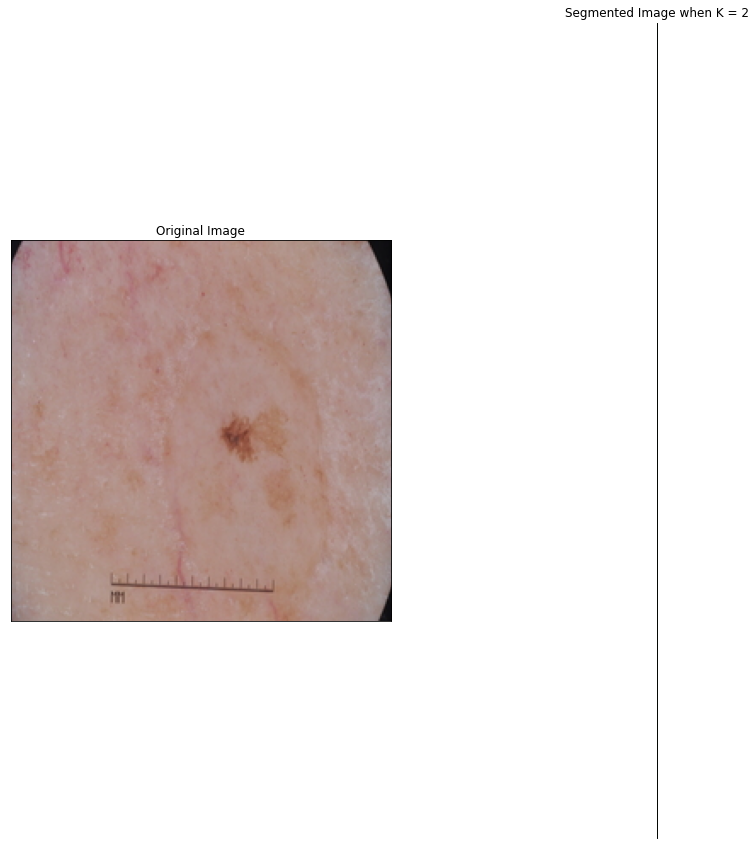

In [35]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(res)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

1. K Means Clustering for Imagery Analysis

we will use a K-means algorithm to perform image classification. Clustering isn’t limited to the consumer information and population sciences, it can be used for imagery analysis as well. Leveraging Scikit-learn and the MNIST dataset, we will investigate the use of K-means clustering for computer vision.

In [36]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


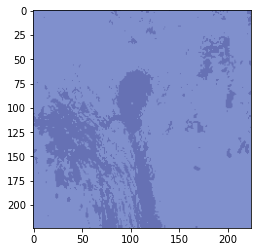

In [37]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

image = cv2.imread(mal_images[2])
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)



plt.imshow(quant)




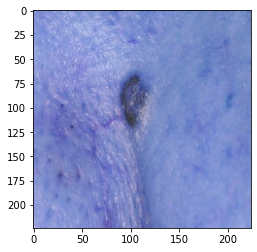

In [38]:
plt.imshow(image)

ML 

Structure of an Image Classification Task
Image Preprocessing - The aim of this process is to improve the image data(features) by suppressing unwanted distortions and enhancement of some important image features so that our Computer Vision models can benefit from this improved data to work on.
Detection of an object - Detection refers to the localization of an object which means the segmentation of the image and identifying the position of the object of interest.
Feature extraction and Training- This is a crucial step wherein statistical or deep learning methods are used to identify the most interesting patterns of the image, features that might be unique to a particular class and that will, later on, help the model to differentiate between different classes. This process where the model learns the features from the dataset is called model training.
Classification of the object - This step categorizes detected objects into predefined classes by using a suitable classification technique that compares the image patterns with the target patterns.

In [39]:
mal_images = glob('../input/skin-cancer-malignant-vs-benign/data/train/malignant/*')
ben_images = glob('../input/skin-cancer-malignant-vs-benign/data/train/benign/*')

In [40]:
len(mal_images)

1197

In [41]:
#Reading Image
import pandas as pd
train_data =[]
for img in  mal_images :
    train_data.append((img,0)) 
    
for img in ben_images : 
    train_data.append((img,1)) 

    
train_data = pd.DataFrame(train_data, columns = ['image','label'] , index = None)
train_data['image'][0] 
train_data

,image,label
0,../input/skin-cancer-malignant-vs-benign/data/...,0
1,../input/skin-cancer-malignant-vs-benign/data/...,0
2,../input/skin-cancer-malignant-vs-benign/data/...,0
3,../input/skin-cancer-malignant-vs-benign/data/...,0
4,../input/skin-cancer-malignant-vs-benign/data/...,0
...,...,...
2632,../input/skin-cancer-malignant-vs-benign/data/...,1
2633,../input/skin-cancer-malignant-vs-benign/data/...,1
2634,../input/skin-cancer-malignant-vs-benign/data/...,1
2635,../input/skin-cancer-malignant-vs-benign/data/...,1


In [42]:
mal_images = glob('../input/skin-cancer-malignant-vs-benign/data/train/malignant/*')



In [43]:
#https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir('../input/skin-cancer-malignant-vs-benign/data/train/malignant'))

# Any results you write to the current directory are saved as output.

#import os
import cv2
W=256
path = r"../input/skin-cancer-malignant-vs-benign/data/train/malignant"
for filename in os.listdir(path):
    if filename.endswith('.jpg'):
        print(filename)
        oriimg = cv2.imread(path+'/'+filename)
        height, width, depth = oriimg.shape
        imgScale = W/width
        newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
        newimg = cv2.resize(oriimg,(int(newX),int(newY)))
        newimg = cv2.cvtColor(oriimg,cv2.COLOR_BGR2GRAY)
        cv2.imwrite(str(path+'/'+filename+"-resized"),newimg)        
        print('Image saved')

['1269.jpg', '623.jpg', '764.jpg', '1075.jpg', '820.jpg', '473.jpg', '1411.jpg', '1031.jpg', '1385.jpg', '333.jpg', '1024.jpg', '537.jpg', '45.jpg', '369.jpg', '56.jpg', '654.jpg', '89.jpg', '20.jpg', '1161.jpg', '785.jpg', '212.jpg', '239.jpg', '1157.jpg', '1304.jpg', '1340.jpg', '150.jpg', '6.jpg', '109.jpg', '149.jpg', '1488.jpg', '1167.jpg', '187.jpg', '521.jpg', '76.jpg', '539.jpg', '516.jpg', '1409.jpg', '71.jpg', '708.jpg', '1222.jpg', '1154.jpg', '1124.jpg', '915.jpg', '815.jpg', '760.jpg', '1459.jpg', '429.jpg', '1055.jpg', '646.jpg', '682.jpg', '544.jpg', '377.jpg', '272.jpg', '795.jpg', '270.jpg', '1162.jpg', '215.jpg', '489.jpg', '576.jpg', '613.jpg', '930.jpg', '243.jpg', '1010.jpg', '153.jpg', '703.jpg', '189.jpg', '143.jpg', '1025.jpg', '1343.jpg', '476.jpg', '717.jpg', '1473.jpg', '327.jpg', '253.jpg', '115.jpg', '131.jpg', '446.jpg', '1498.jpg', '626.jpg', '425.jpg', '5.jpg', '824.jpg', '366.jpg', '1101.jpg', '850.jpg', '885.jpg', '1327.jpg', '151.jpg', '1097.jpg', '13